<a href="https://colab.research.google.com/github/mohan844/SVM_linear_classifier_US_airline_tweet/blob/main/SVM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing some necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the csv file
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Machine Learning/Support Vector Machine/Tweets.csv")

In [ ]:
# Head into the data:
df.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [ ]:
round(df.isnull().mean()*100,2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [ ]:
# Droping the columns which have more than 60 percent null values & useless column like tweet_id,name etc:
df.drop(columns=['airline_sentiment_gold','negativereason_gold','name','tweet_coord'],axis=1,inplace=True)

In [ ]:
df.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

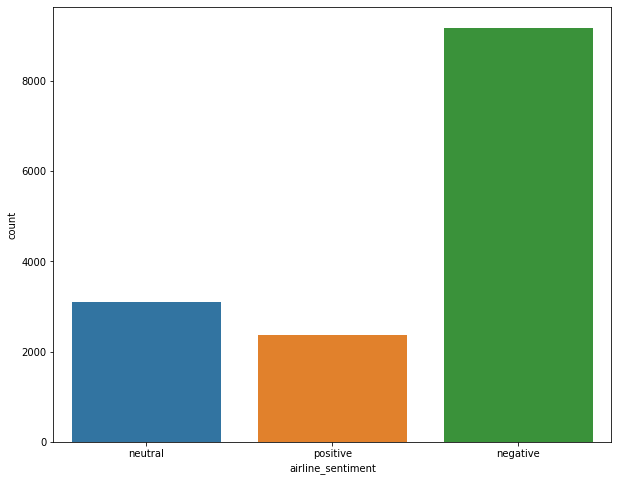

In [ ]:
# Count all the airline sentiments:
plt.figure(figsize=(10,8))
sns.countplot(df['airline_sentiment'])

## Seems like people have uncomfortable journey , thats why negative scores more.

In [ ]:
# Total unique airlines:
un_air = df['airline'].unique()
un_air

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   retweet_count                 14640 non-null  int64  
 7   text                          14640 non-null  object 
 8   tweet_created                 14640 non-null  object 
 9   tweet_location                9907 non-null   object 
 10  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ MB


,airline,tweet_id
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


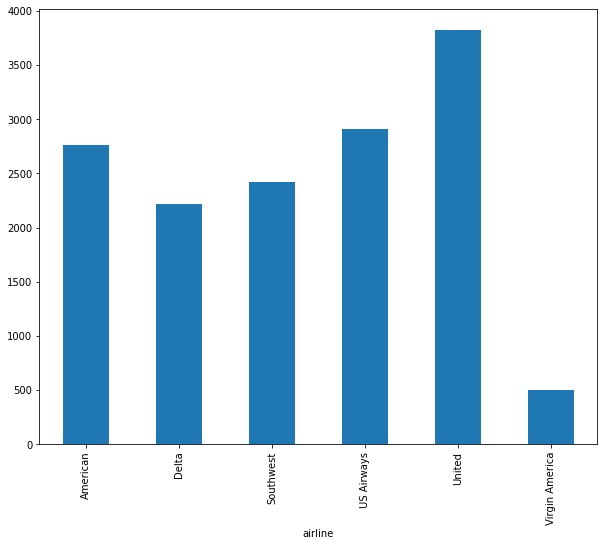

In [ ]:
df.groupby(['airline'])['tweet_id'].count().plot(kind='bar',figsize=(10,8))
df.groupby(['airline'])['tweet_id'].count().reset_index()

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


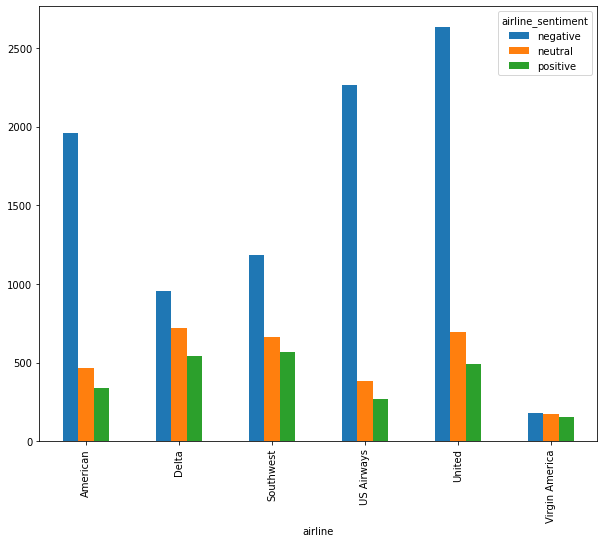

In [ ]:
# Ploting total no of sentiments of each air lines and respective type of sentiments:
df.groupby(['airline','airline_sentiment'])['tweet_id'].count().unstack().plot(kind='bar',figsize=(10,8))
df.groupby(['airline','airline_sentiment'])['tweet_id'].count().unstack()

**All the airline have majorly negative reviews , none of them provides pleasure experiance. Now we calucate the positive ratio in next cell to visulalize which airline is best among them.**

<AxesSubplot:xlabel='airline', ylabel='positive_ratio'>

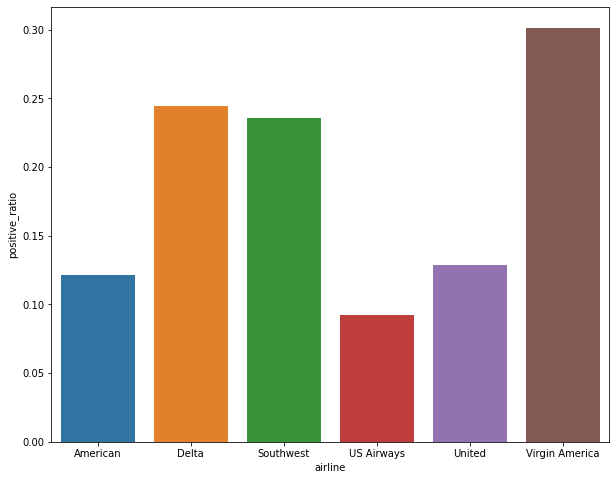

In [ ]:
# Finding which airline provides the good experiance than others.
gr_df = df.groupby(['airline','airline_sentiment'])['tweet_id'].count().unstack().reset_index()
gr_df['positive_ratio'] = gr_df['positive']/(gr_df['negative'] + gr_df['neutral'] + gr_df['positive'])
plt.figure(figsize=(10,8))
sns.barplot(x=gr_df['airline'],y=gr_df['positive_ratio'])

**Virgin America has good reviews among other on other hand US airways is worst in service.**

In [ ]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

<AxesSubplot:xlabel='airline'>

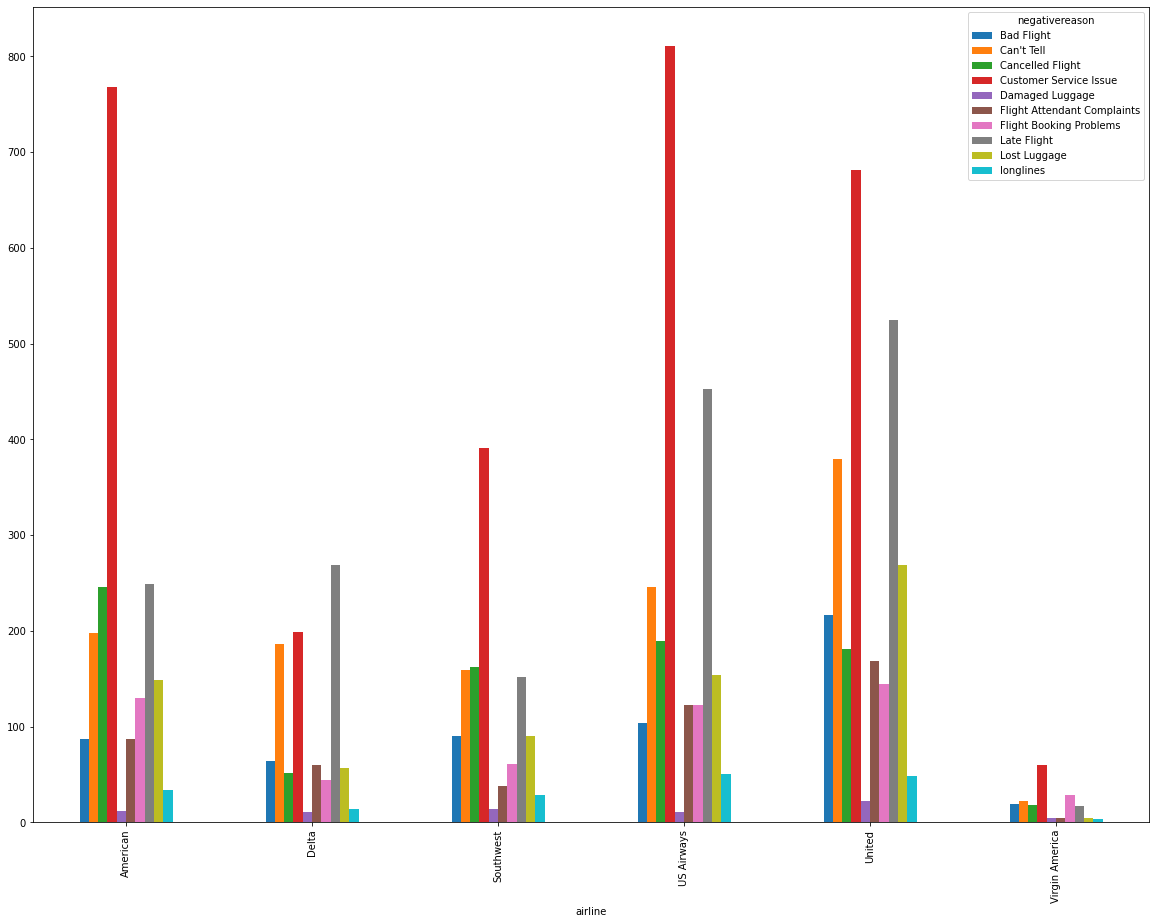

In [ ]:
df.groupby(['airline','negativereason'])['tweet_id'].count().unstack().plot(kind='bar',figsize=(20,15))



1.   Customer service issue becames the major issue in the flights
2.   Late flights is the main issue for delta



## Analyse the data according to Date:

In [ ]:
# Convert time object to date time format:
from datetime import datetime
df['tweet_created'] = df['tweet_created'].apply(lambda z: datetime.strptime(z,'%Y-%m-%d %H:%M:%S %z'))

In [ ]:
df['tweet_created'] = df['tweet_created'].apply(lambda z: z.strftime('%Y-%m-%d'))

In [ ]:
df['tweet_created'] = df['tweet_created'].apply(lambda z: datetime.strptime(z,'%Y-%m-%d'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   retweet_count                 14640 non-null  int64         
 7   text                          14640 non-null  object        
 8   tweet_created                 14640 non-null  datetime64[ns]
 9   tweet_location                9907 non-null   object        
 10  user_timezone                 9820 non-null   object        
dtypes: datetime64[ns](1), float6

In [ ]:
max_time = df['tweet_created'].max()
min_time = df['tweet_created'].min()
print('Maximum time:', max_time)
print('Minimum time:', min_time)

Maximum time: 2015-02-24 00:00:00
Minimum time: 2015-02-16 00:00:00


# We have only Nine days of data:

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='tweet_created'>

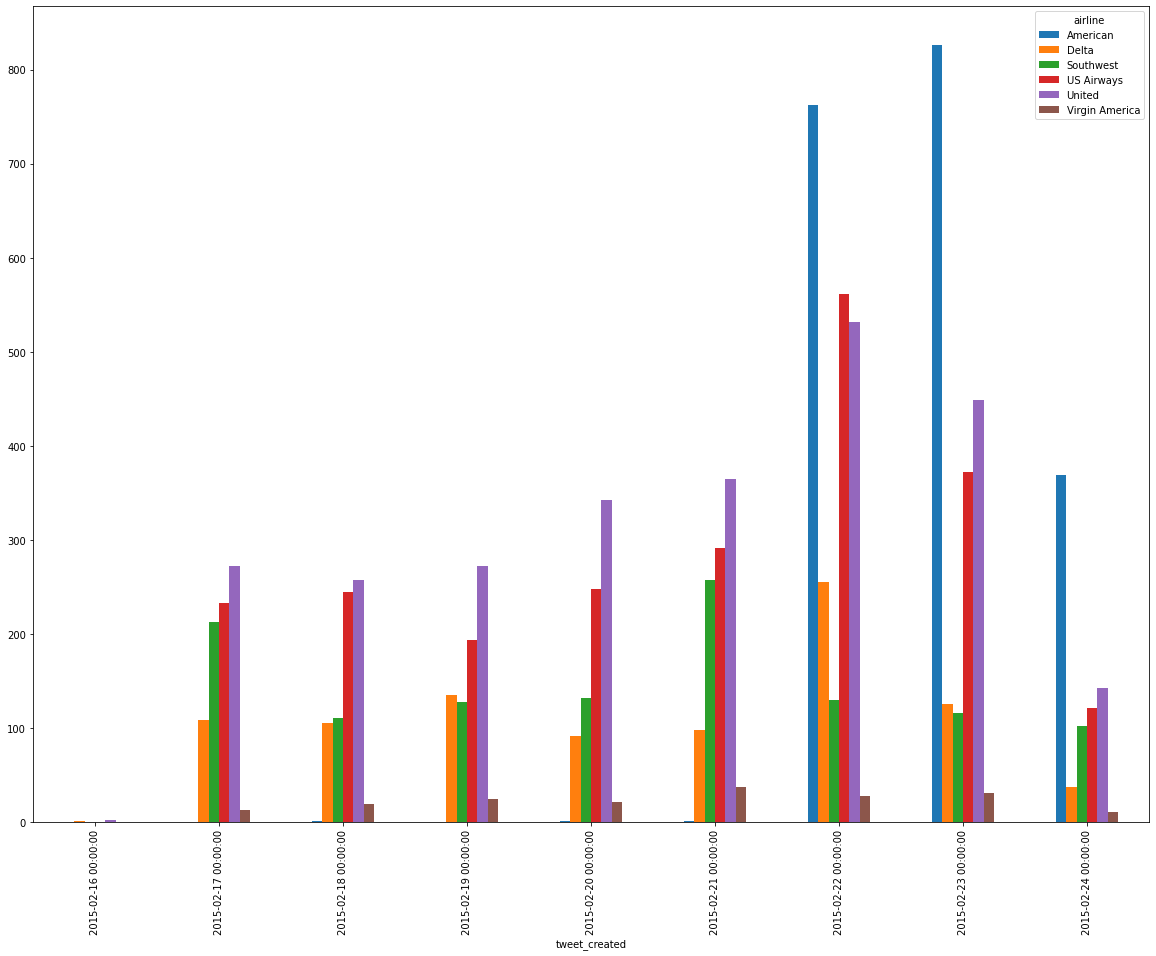

In [ ]:
# Studying the negative reviews according to the date:
from matplotlib import figure
negative_df = df[df['airline_sentiment'] == 'negative']
negative_df.groupby(['tweet_created','airline'])['tweet_id'].count().unstack().plot(kind='bar',figsize=(20,15))



*   Virgin America have less negative review as compared to rest of othere airlines.
*   American airline seems to solve customer issues on 16 to 21 on other hand from 22 to 24 they have more issues then other airlines



In [ ]:
# Filtering Data to keep only positive and negative sentiments:
final_df = df[df['airline_sentiment'] != 'normal']

In [ ]:
final_df.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24,Los Angeles,Eastern Time (US & Canada)


## Text pre-processing:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
stop_words = list(stopwords.words('english'))
punct = list(string.punctuation)  

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
punct

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
# Function for text processing:
def text_process(msg):
  i= [char for char in msg if char not in punct]
  
  i= ''.join(i)
  return ' '.join([words for words in i.split(' ') if words.lower() not in stop_words])


In [ ]:
final_df['text'] = final_df['text'].apply(text_process)

In [ ]:
final_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,VirginAmerica dhepburn said,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,VirginAmerica plus youve added commercials exp...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,VirginAmerica didnt today Must mean need take ...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,VirginAmerica really aggressive blast obnoxiou...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,VirginAmerica really big bad thing,2015-02-24,NaN,Pacific Time (US & Canada)


## Applying Vectorization:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizor = CountVectorizer()
x=vectorizor.fit_transform(final_df['text'])

In [ ]:
X = x.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Encoding for sentimental variable:
final_df['airline_sentiment'] = final_df['airline_sentiment'].apply(lambda z: 1 if z=='positive' else 0 )

In [ ]:
Y = np.array(final_df['airline_sentiment'])

In [ ]:
Y

array([0, 1, 0, ..., 0, 0, 0])

## Spliting the Data:

In [ ]:
# Spliting the data:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2,stratify=Y)

## Applying linear classifier as Kernel:

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=10)

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred)

0.9050546448087432

In [ ]:
confusion_matrix(y_test,pred)

array([[2321,  134],
       [ 144,  329]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2455
           1       0.71      0.70      0.70       473

    accuracy                           0.91      2928
   macro avg       0.83      0.82      0.82      2928
weighted avg       0.90      0.91      0.90      2928





*   We have Achievied 91 % Accuracy on test Data set. which seems pretty good.

*   Precision, Accuray & Recalls are too Apprecitable


